# Deliver-on-time                          
# Food Delivery Time Prediction Model

![Develiry Food](../imgs/boltcloneapp.jpg)

The accurate estimation of delivery time is pivotal in the food delivery sector, profoundly impacting customer satisfaction. A dependable prediction model was crafted through meticulous data refinement, ensuring precision and reliability.

We initiated the process by meticulously purifying the dataset, eradicating inconsistencies and errors. This pivotal step fortified the model's credibility, guaranteeing precise predictions.

Next, through feature engineering, we harnessed valuable insights from the dataset. Factors like delivery personnel demographics, ratings, geographical coordinates, and temporal variables were analyzed to capture influential elements affecting delivery time. These derived features significantly enhanced the model's predictive prowess.

Utilizing regression algorithms such as linear regression, decision trees, random forest, XGBoost, we constructed the predictive model. Trained on a subset of the dataset with techniques like cross-validation, it ensured robustness. Evaluation metrics like mean squared error (MSE) and R-squared (R2) gauged the model's accuracy.

The food delivery time prediction model serves as a catalyst for businesses, enabling operational optimization and an enhanced delivery experience for customers.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load & Understand Data

## About Data

Food delivery is a courier service in which a restaurant, store, or independent food-delivery company delivers food to a customer. An order is typically made either through a restaurant or grocer's website or mobile app, or through a food ordering company. The delivered items can include entrees, sides, drinks, desserts, or grocery items and are typically delivered in boxes or bags. The delivery person will normally drive a car, but in bigger cities where homes and restaurants are closer together, they may use bikes or motorized scooters.
For more about data: [kaggle](https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset?select=train.csv)

In [2]:
delivery_data = pd.read_csv('../datasets/train.csv')
delivery_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [3]:
## Data set size
print(f'The data set have {delivery_data.shape[0]} rows and {delivery_data.shape[1]} columns')

The data set have 45593 rows and 20 columns


In [4]:
## Data set information
print("=="*30)
print(" "*20, "Data set information")
print("=="*30)
print(delivery_data.info())

                     Data set information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         455

# Exploratory Data Analysis (EDA)

In [5]:
delivery_data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [6]:
# Update Column Names
delivery_data.columns = delivery_data.columns.str.strip()
delivery_data.columns = delivery_data.columns.str.replace(' ', '_')


delivery_data.rename(columns={'Weatherconditions': 'Weather_conditions'},inplace=True)
delivery_data.rename(columns={'Time_Orderd': 'Time_Ordered'},inplace=True)
delivery_data.rename(columns={'City': 'City_type'},inplace=True)
    
delivery_data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Ordered',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City_type', 'Time_taken(min)'],
      dtype='object')

In [7]:
#Check statistical values for fields with numerical datatype
delivery_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [8]:
#Check statistical values for fields with other than numerical datatype
delivery_data.describe(exclude=np.number).T

,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Ordered,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weather_conditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


In [9]:
#Explore each column
for column in delivery_data.columns:
    print(column)
    print(delivery_data[column].value_counts())
    print("------------------------------------")

ID
ID
0x4607     1
0x1f3e     1
0xe251     1
0x3f31     1
0x4a78     1
          ..
0xc3f1     1
0x5db7     1
0x1985     1
0xceda     1
0x5fb2     1
Name: count, Length: 45593, dtype: int64
------------------------------------
Delivery_person_ID
Delivery_person_ID
PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: count, Length: 1320, dtype: int64
------------------------------------
Delivery_person_Age
Delivery_person_Age
35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: count, dtype: int64
------------------------------------
Delivery_perso

## Data Cleaning

In [10]:
#Clen relevant values from data
def extract_column_value(df):
    # Apply the modification only to the selected rows
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()) if isinstance(x, str) else x)
    #Extract "conditiond " noise from Weather conditions
    df['Weather_conditions'] = df['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip())
    #Extract city code from Delivery person ID
    df['City_code']=df['Delivery_person_ID'].str.split("RES", expand=True)[0]
    
extract_column_value(delivery_data)
delivery_data[['Time_taken(min)','Weather_conditions','City_code']].head()

,Time_taken(min),Weather_conditions,City_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [11]:
#Drop Columns which won't be used for model building
delivery_data.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)

In [12]:
# Checking duplicate rows
print(f'There are {delivery_data.duplicated().sum()} duplicate rows')

There are 0 duplicate rows


In [13]:
#Update datatypes
def update_datatype(df):
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
    df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
    df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")
    
update_datatype(delivery_data)

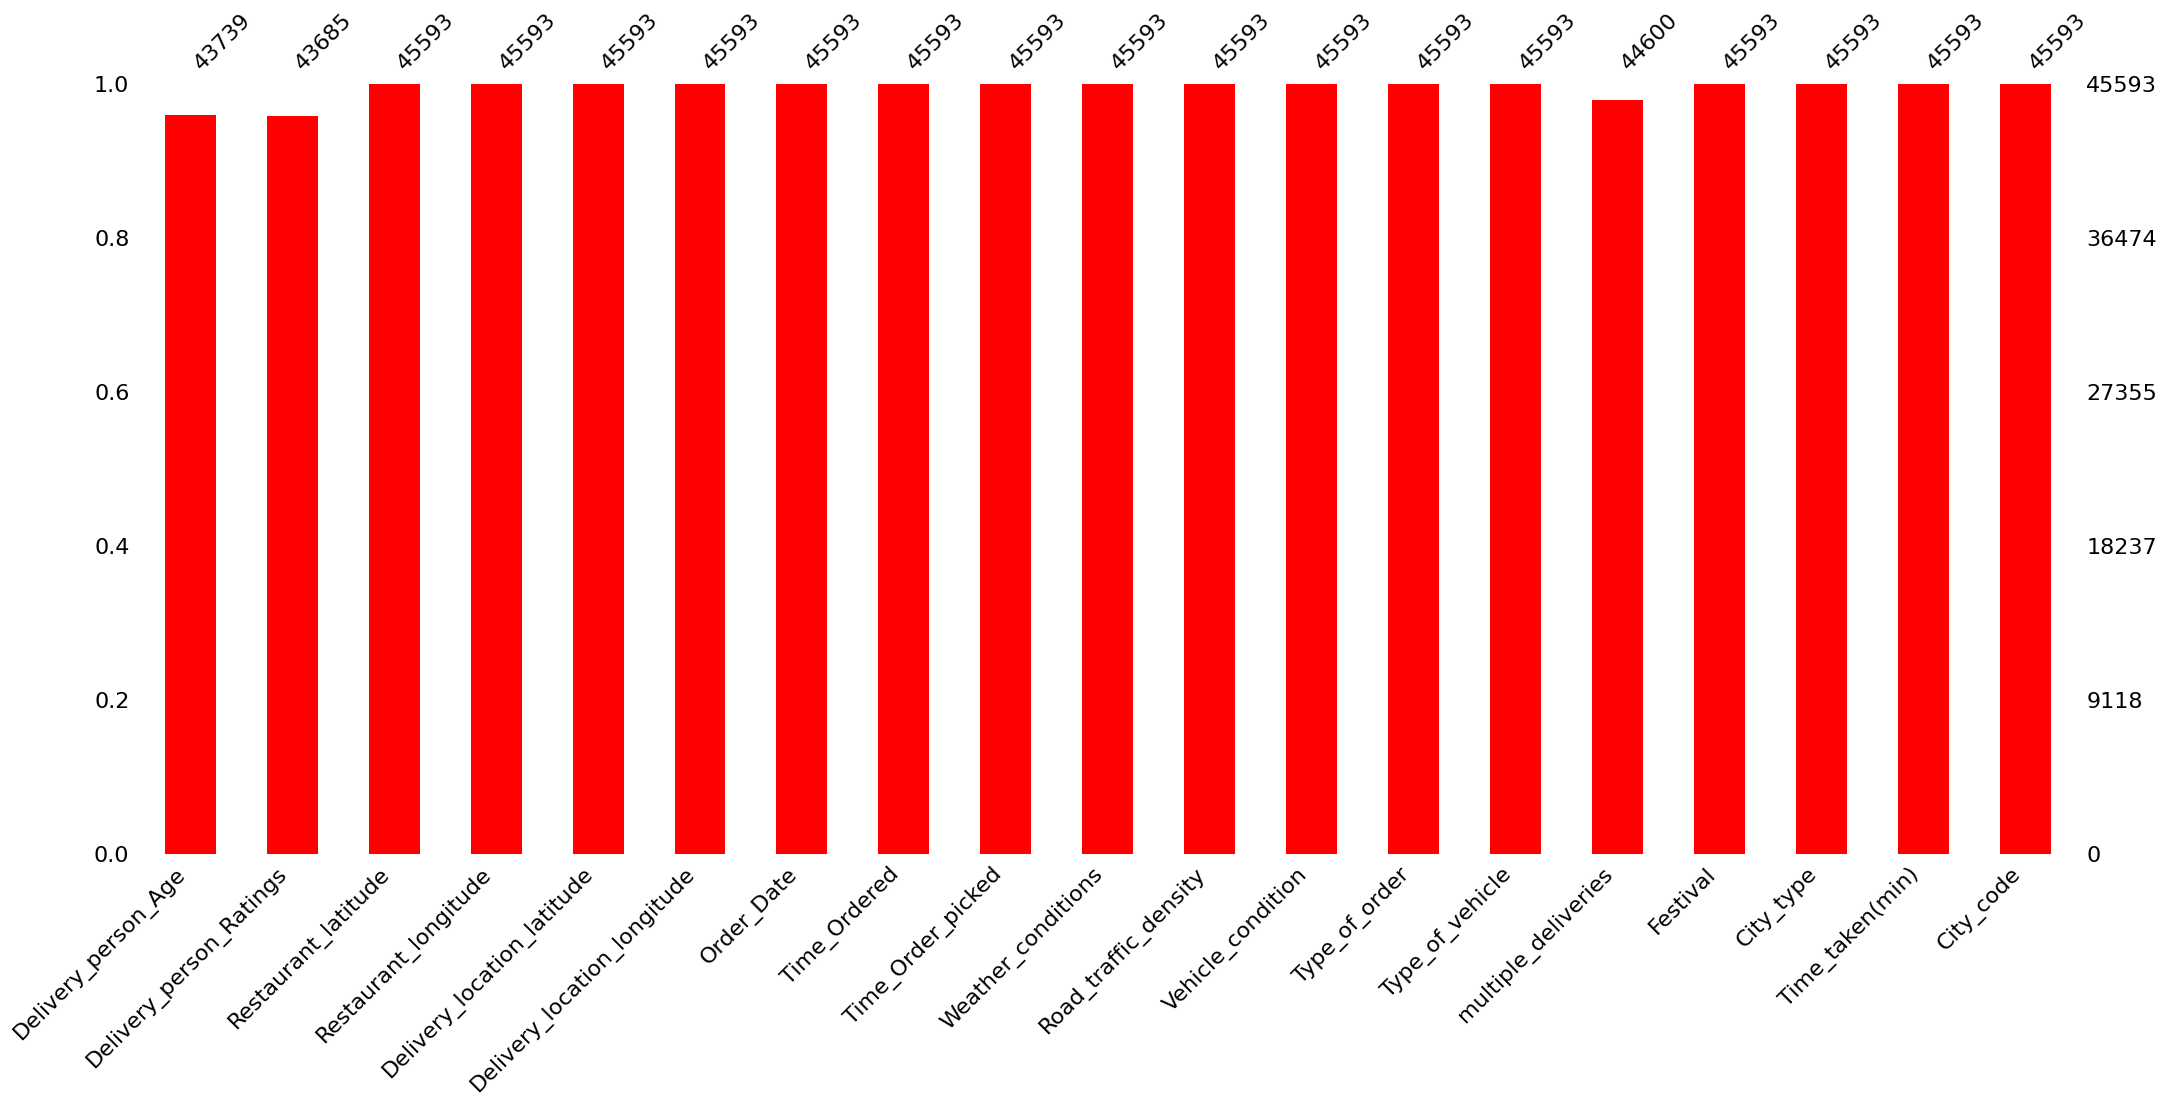

In [14]:
# Checking null values version 1
import missingno as ms

ms.bar(delivery_data, color = 'red')
plt.show()

In [15]:
#Check null values
delivery_data.replace('NaN', float(np.nan), regex=True,inplace=True)
delivery_data.isnull().sum().sort_values(ascending=False)


Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Ordered                   1731
City_type                      1200
multiple_deliveries             993
Weather_conditions              616
Road_traffic_density            601
Festival                        228
Order_Date                        0
Delivery_location_longitude       0
Time_Order_picked                 0
Delivery_location_latitude        0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Restaurant_longitude              0
Restaurant_latitude               0
Time_taken(min)                   0
City_code                         0
dtype: int64

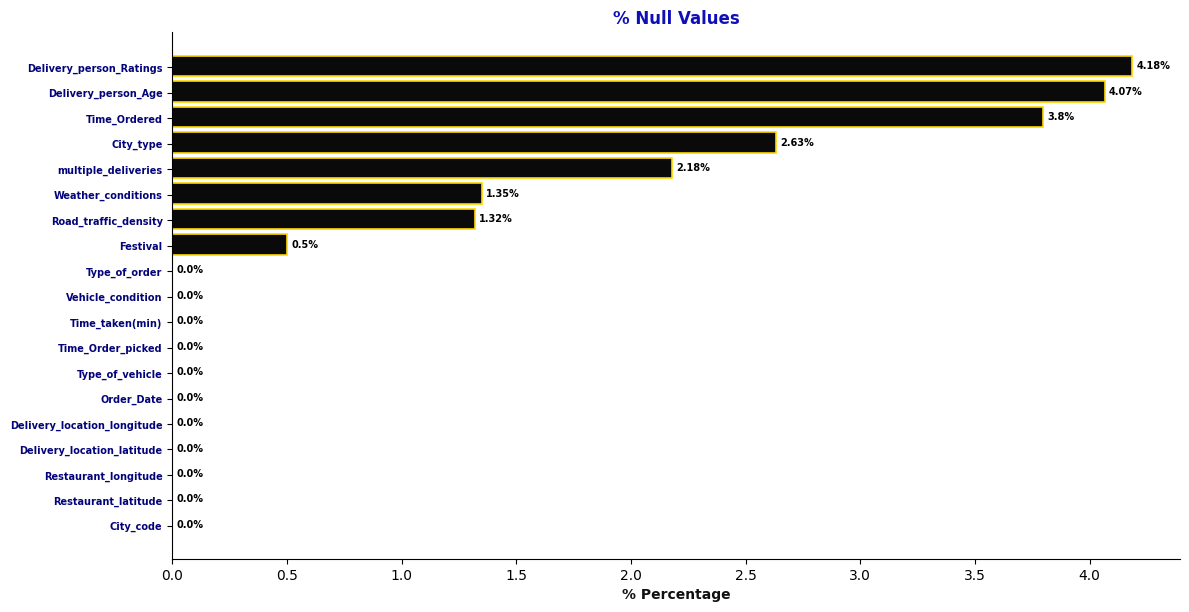

In [16]:
## Checking null values version 2
#===========================================================================

df_null_values = delivery_data.isnull().sum().to_frame().rename(columns={0:'Count'})
df_null_values['Null_percentage'] = (df_null_values['Count']/len(delivery_data))*100.
df_null_values['NonNull_percentage'] = 100.-df_null_values['Null_percentage']
df_null_values = df_null_values.sort_values('Null_percentage', ascending = True)


n = len(df_null_values.index)
x = np.arange(n)

fig,ax = plt.subplots(figsize=(12,6.5))

rects1 = ax.barh(x,
                 df_null_values.iloc[:,1],
                 label='% Null values',
                 linewidth = 1.2,
                 edgecolor='gold',
                 color='#0a0a0a')


ax.set_title('% Null Values',fontsize=12, fontweight='bold', color = '#0f0fba')
ax.set_xlabel('% Percentage',fontsize=10, fontweight='bold', color = '#111112')
ax.set_yticks(x-0.05)
ax.set_yticklabels(df_null_values.index, fontsize=7, fontweight='bold',color='#04047a')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


def autolabel(rects):
  for rect in rects:
      width = rect.get_width()
      ax.annotate('{}%'.format(round(width,2)),
                  xy=(width, rect.get_y() + rect.get_height() / 2),
                  xytext=(3,0),
                  textcoords="offset points",
                  ha='left', va='center', size = 7, weight = 'bold')

autolabel(rects1)

fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.show()

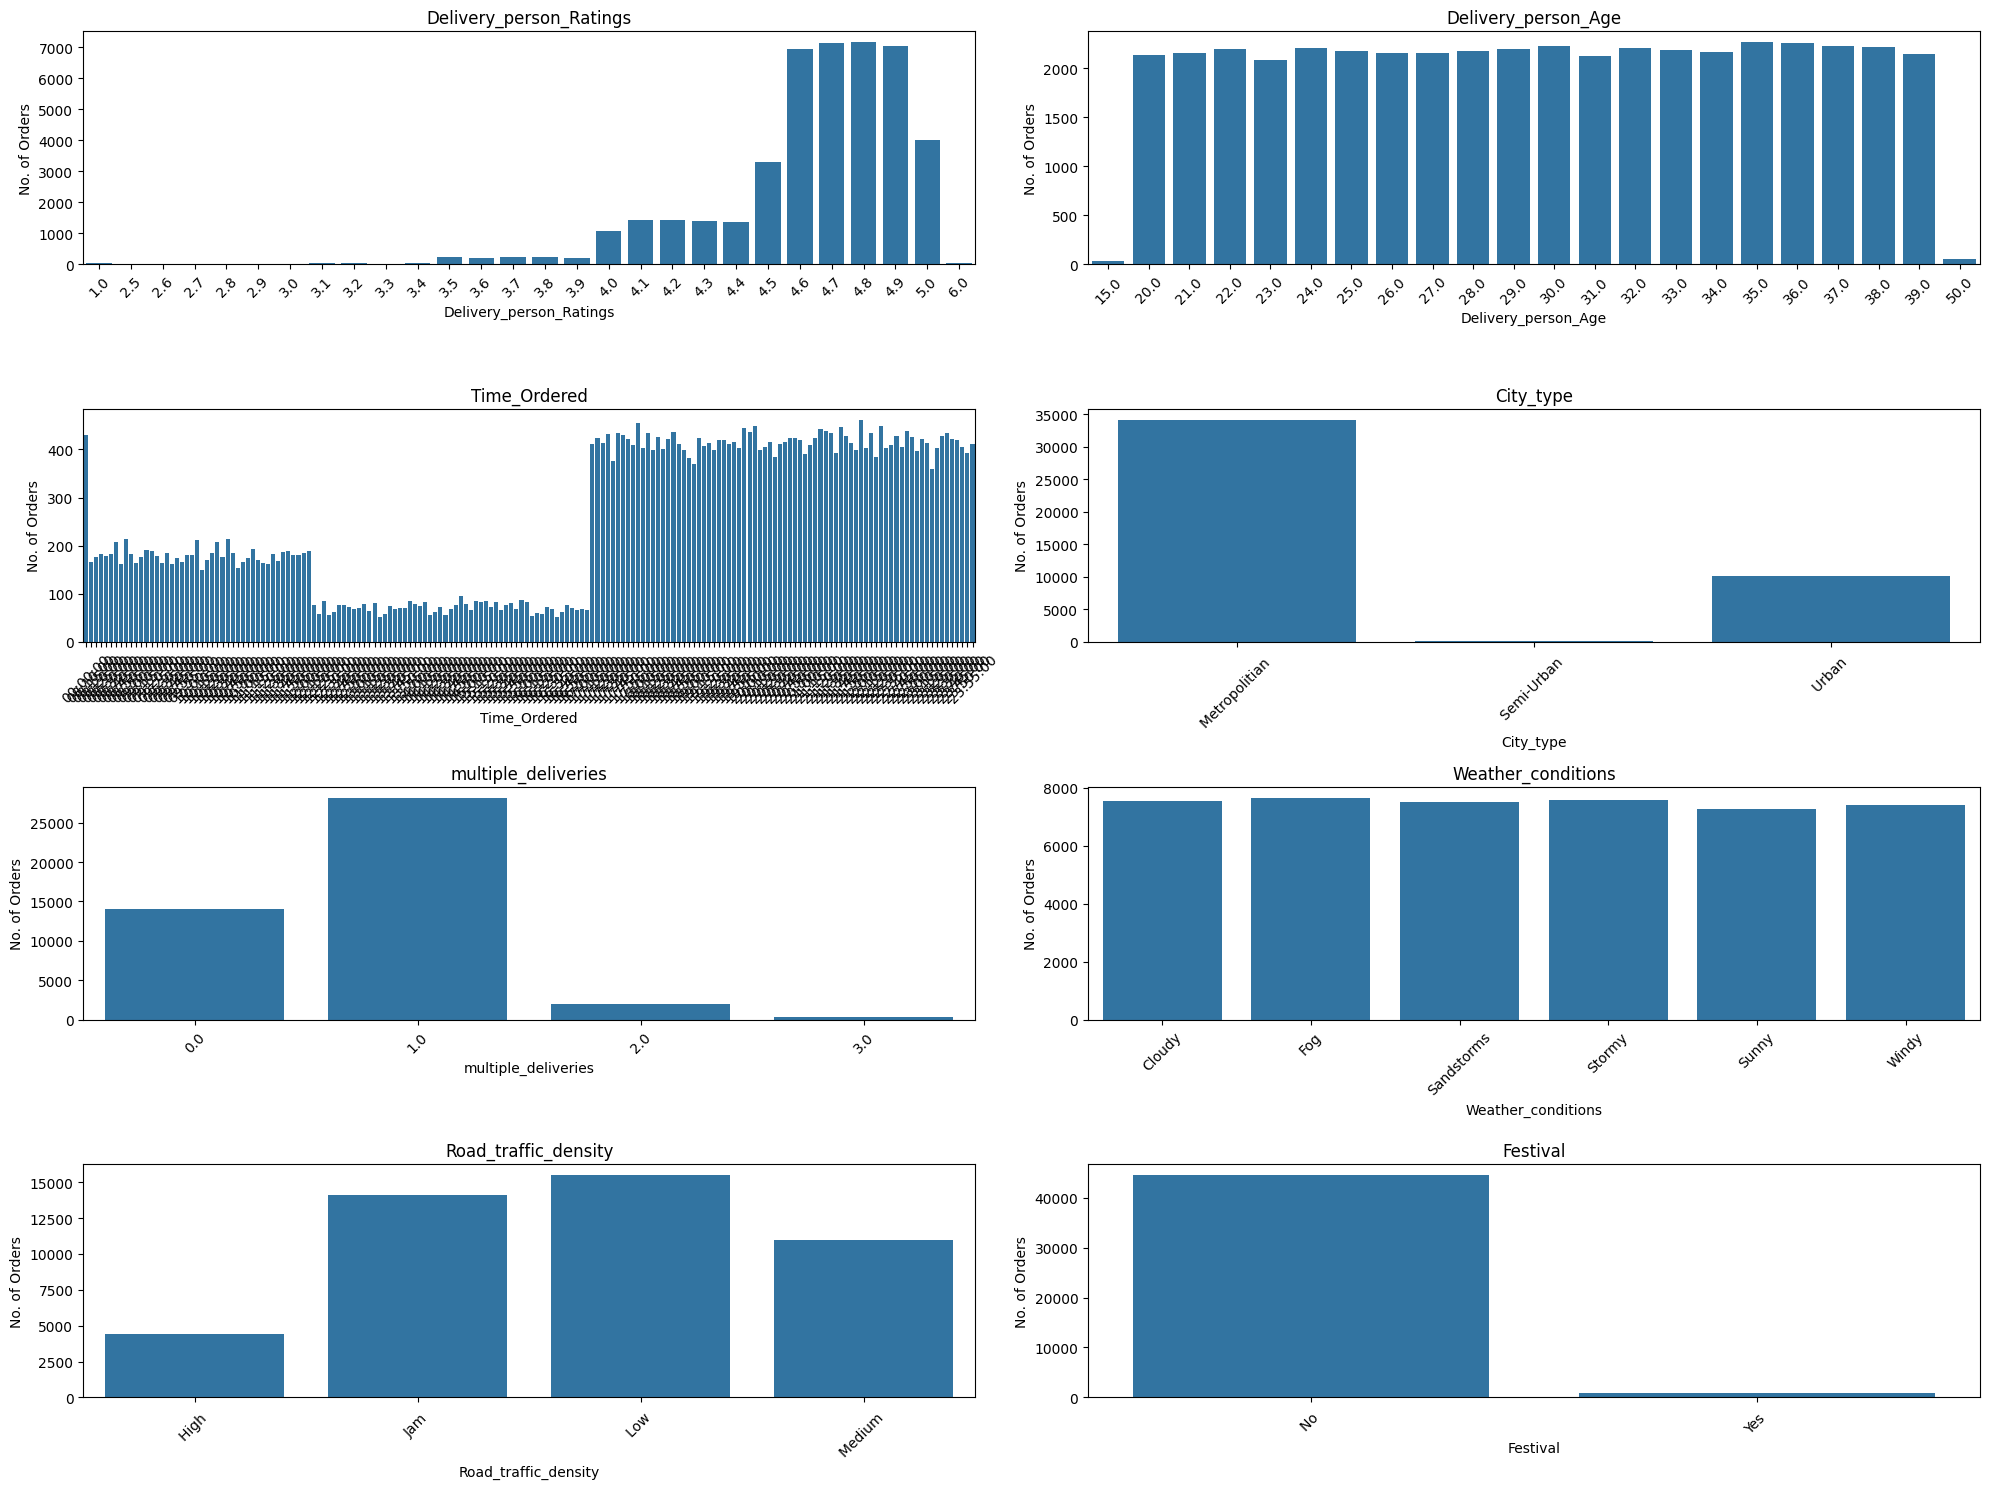

In [17]:
#Let's explore columns that have null values
cols = ['Delivery_person_Ratings','Delivery_person_Age', 'Time_Ordered', 'City_type', 'multiple_deliveries', 'Weather_conditions','Road_traffic_density','Festival']
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(20,15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.countplot(data=delivery_data, x=column_name, order=delivery_data[column_name].value_counts().sort_index().index, ax=ax)

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(column_name)
    ax.tick_params(axis='x', rotation=45)
    
if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

### Handling Missing Values

- As for Delivery_person_Ratings, which exhibits a left-skewed distribution, the missing values will be filled with the median.
It's robust against outliers and tends to represent the central tendency well. This strategy should help preserve the overall distribution of ratings without being heavily influenced by extreme values.

- For Delivery_person_Age and Weather_conditions, which display nearly uniform distributions, the missing values will be filled randomly.
It doesn't introduce bias by repeatedly using a single value, and it's a reasonable assumption that missing values might take any value from the observed range.

- For the remaining categorical columns, the missing values will be filled with the mode, representing the most frequently occurring value in each respective column.
 It helps maintain the existing distribution of categorical variables and ensures the new data follows the established patterns.


These approaches will help ensure that missing values are appropriately handled based on the characteristics of each column.


In [18]:
#Handle null values
def handle_null_values(df):
    df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age']), inplace=True)
    df['Weather_conditions'].fillna(np.random.choice(df['Weather_conditions']), inplace=True)
    df['City_type'].fillna(df['City_type'].mode()[0], inplace=True)
    df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)
    df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
    df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
    df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True)
    
handle_null_values(delivery_data)
delivery_data.isnull().sum()

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Ordered                   1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City_type                         0
Time_taken(min)                   0
City_code                         0
dtype: int64

## Feature Engineering

Now, onto the next phase of Feature Engineering! Here, we're diving into the data to pick out, tweak, and craft some clever features. The goal? Boosting how well our machine learning models perform. This step isn't just about improving accuracy; it's also about sidestepping a common hiccup in modeling—overfitting—and maybe even uncovering some sneaky patterns hiding in the data.

Here's the scoop for this particular case: We've got some nifty details like when orders were placed, when they were snagged for delivery, and even the good ol' date of the order. These time-related nuggets are like treasure troves, ripe for creating a bunch of fresh features that can really shine a light on different aspects of timing.

But wait, there's more! We've also got latitude and longitude for both the restaurant and delivery spots. With these coordinates in hand, we can figure out how far apart these places are. Bam! Another awesome feature for our dataset.

Let's kick things off by whipping up some new features based on the Order Date. Ready to roll!

In [19]:
def extract_date_features(data):
    data["day"] = data.Order_Date.dt.day
    data["month"] = data.Order_Date.dt.month
    data["quarter"] = data.Order_Date.dt.quarter
    data["year"] = data.Order_Date.dt.year
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)
    data["is_quarter_start"] = data.Order_Date.dt.is_quarter_start.astype(int)
    data["is_quarter_end"] = data.Order_Date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.Order_Date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.Order_Date.dt.is_year_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)

extract_date_features(delivery_data)
delivery_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,Time_Order_picked,Weather_conditions,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,1,2022,5,0,0,0,0,0,0,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,1,2022,4,0,0,0,0,0,0,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,...,1,2022,5,0,0,0,0,0,0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,...,2,2022,1,0,0,0,0,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,1,2022,5,0,0,0,0,0,0,1


In [20]:
#Calculate Time Differnce 
def calculate_time_diff(df):
    # Convert columns to datetime objects
    df['Time_Ordered'] = pd.to_datetime(df['Time_Ordered'])
    df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'])

    # Calculate the food preparation time
    df['order_prepare_time'] = df['Time_Order_picked'] - df['Time_Ordered']
    # Handle negative time differences (if any)
    df.loc[df['order_prepare_time'].dt.total_seconds() < 0, 'order_prepare_time'] += pd.Timedelta(days=1)
    df["order_prepare_time"] = df["order_prepare_time"].dt.total_seconds() / 60
    
    # Handle null values by filling with the median
    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)
    
    # Drop all the time & date related columns
    df.drop(['Time_Ordered', 'Time_Order_picked', 'Order_Date'], axis=1, inplace=True)


calculate_time_diff(delivery_data)
delivery_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,2022,5,0,0,0,0,0,0,1,15.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,2022,4,0,0,0,0,0,0,0,5.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,2022,5,0,0,0,0,0,0,1,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,2022,1,0,0,0,0,0,0,0,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,2022,5,0,0,0,0,0,0,1,15.0


**Calculating distance from geocodes** 
1. geopy:

geopy is a Python client for several popular geocoding web services.
geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources. [Read more](https://pypi.org/project/geopy/)

2. Haversine Formula:

The Haversine formula is used to find the distance between two geographical locations. The formula refers to this [Wikipedia](https://en.wikipedia.org/wiki/Haversine_formula) page as follows:

![Formula](../imgs/haversine_formula.png)

In [21]:
# #Example code for Haversine formula
# R = 6371  ##The earth's radius (in km)

# def deg_to_rad(degrees):
#     return degrees * (np.pi/180)

# ## The haversine formula
# def distcalculate(lat1, lon1, lat2, lon2):
#     d_lat = deg_to_rad(lat2-lat1)
#     d_lon = deg_to_rad(lon2-lon1)
#     a1 = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1))
#     a2 = np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
#     a = a1 * a2
#     c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
#     return R * c

# # Create distance column & calculate the distance
# data['distance'] = np.nan

# for i in range(len(data)):
#   data.loc[i, 'distance'] = distcalculate(data.loc[i, 'Restaurant_latitude'], 
#                                           data.loc[i, 'Restaurant_longitude'], 
#                                           data.loc[i, 'Delivery_location_latitude'], 
#                                           data.loc[i, 'Delivery_location_longitude'])

In [22]:
#Calculate distance between restaurant location & delivery location
def calculate_distance(df):
    df['distance(km)']=np.zeros(len(df))
    restaurant_coordinates=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
    delivery_location_coordinates=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    df['distance(km)'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
    df['distance(km)']= df['distance(km)'].astype("str").str.extract('(\d+)').astype("int64")
    
calculate_distance(delivery_data)
delivery_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance(km)
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,5,0,0,0,0,0,0,1,15.0,6


### Handling Categorical Values - Encoding

- Weather_conditions: **one-hot encoding** because weather conditions like 'Sunny', 'Stormy', 'Cloudy', etc., don't have a natural order, and each condition is distinct.

- Road_traffic_density: **Ordinal encoding** might be suitable if the traffic density levels have a clear order such as 'Low', 'Medium', 'High'.

- Type_of_order: **label encoding** cause no inherent order among the types of orders, such as 'Snack', 'Drinks', 'Buffet'.

- Type_of_vehicle: Similar to 'Type_of_order', **label encoding** can be applied cause the vehicle types don’t have a specific order ('motorcycle', 'scooter', etc.).

- Festival: **One-hot encoding** can be used here cause festivals are distinct categories without any inherent order ('Yes'/'No').

- City_type: **one-hot encoding** cause the types of cities are distinct and unordered.

- City_code: **label encoding**  to avoid creating too many new columns while there's a large number of distinct values. 

In [23]:
# on-hot encoding: 
delivery_data["Festival"] = delivery_data["Festival"].replace({'Yes ': 1, 'No ': 0}).astype(int)

one_hot_encode_cols = ["Weather_conditions", "City_type"]
def on_hot_encode(df, columns):
    for col in columns:
        df = pd.get_dummies(df, columns=[col])
    return df
delivery_data = on_hot_encode(delivery_data, one_hot_encode_cols)

# # convert bools to 0/1 int type
# bool_columns = delivery_data.select_dtypes(include=bool).columns.tolist()
# delivery_data[bool_columns] = delivery_data[bool_columns].astype(int)


# Road_traffic_density: Ordinal encoding/mapping
traffic_density_mapping = {
    'Low ': 0,
    'Medium ': 1,
    'High ': 2,
    'Jam ': 3
}
delivery_data['Road_traffic_density'] = delivery_data['Road_traffic_density'].map(traffic_density_mapping)


# Label Encoding
label_encode_cols = ["Type_of_order", "Type_of_vehicle", "City_code"]
def label_encoding(df, columns):
    label_encoder = LabelEncoder()
    df[columns] = df[columns].apply(lambda col: label_encoder.fit_transform(col))
    return df

delivery_data = label_encoding(delivery_data, label_encode_cols)
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Delivery_person_Age            45593 non-null  float64
 1   Delivery_person_Ratings        45593 non-null  float64
 2   Restaurant_latitude            45593 non-null  float64
 3   Restaurant_longitude           45593 non-null  float64
 4   Delivery_location_latitude     45593 non-null  float64
 5   Delivery_location_longitude    45593 non-null  float64
 6   Road_traffic_density           45593 non-null  int64  
 7   Vehicle_condition              45593 non-null  int64  
 8   Type_of_order                  45593 non-null  int64  
 9   Type_of_vehicle                45593 non-null  int64  
 10  multiple_deliveries            45593 non-null  float64
 11  Festival                       45593 non-null  int64  
 12  Time_taken(min)                45593 non-null 

In [24]:
delivery_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,...,distance(km),Weather_conditions_Cloudy,Weather_conditions_Fog,Weather_conditions_Sandstorms,Weather_conditions_Stormy,Weather_conditions_Sunny,Weather_conditions_Windy,City_type_Metropolitian,City_type_Semi-Urban,City_type_Urban
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2,2,3,2,...,3,False,False,False,False,True,False,False,False,True
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3,2,3,3,...,20,False,False,False,True,False,False,True,False,False
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,0,0,1,2,...,1,False,False,True,False,False,False,False,False,True
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,1,0,0,2,...,7,False,False,False,False,True,False,True,False,False
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2,1,3,3,...,6,True,False,False,False,False,False,True,False,False


## Train test split

In [25]:
X = delivery_data.drop('Time_taken(min)', axis=1)  # Features
y = delivery_data['Time_taken(min)']  # Target variable

# Further splitting the training data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_test.shape)
print(X_test.shape)
print(y_test.shape)

(36474, 36)
(9119,)
(9119, 36)
(9119,)


## Standardization

We'll tackle the varied scales within the food delivery dataset by employing Standardization. This method entails adjusting the features to attain a mean of zero and a standard deviation of one. This approach prevents any one feature from overpowering the learning process, promoting equitable comparison among features. Standardization aids in quicker convergence and boosts the machine learning model's overall performance.

In [26]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)


# Model Building

Model Development

In this phase, our objective is to create a robust machine learning model aimed at accurately predicting food delivery times, a task falling within the realm of regression problems as it involves forecasting numerical values. To achieve this, we have at our disposal a range of regression algorithms including Linear Regression, Decision Trees, Random Forest, and XGBoost.

To discern the most fitting algorithm for our dataset, we employ the technique of GridSearchCV. This method allows us to systematically explore and pinpoint the algorithm that best suits our model. Moreover, it facilitates the fine-tuning of hyperparameters, enabling us to derive optimal performance. GridSearchCV empowers us to methodically navigate through diverse combinations of algorithms and hyperparameters, ensuring the identification of the most effective configuration tailored to our specific prediction challenge.

### Steps
1. Employ cross-validation & hyper parameter tuning to determine the optimal regression model.
2. Construct the food delivery prediction model using the identified best model.
3. Evaluate the model's performance on the testing data to assess its accuracy and reliability.

### Cross Validation

In [27]:
# Find the best model
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor(),
]

param_grid = [
    {},  
    {'max_depth': [3, 5, 7, 9]},
    {'n_estimators': [100, 200, 300, 400]},
    {'n_estimators': [15, 20, 25, 30], 'max_depth': [5, 7, 9, 11]},
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()

LinearRegression:
Best parameters: {}
Best R2 score: 0.5359050604510165

DecisionTreeRegressor:
Best parameters: {'max_depth': 9}
Best R2 score: 0.776270431042007

RandomForestRegressor:
Best parameters: {'n_estimators': 400}
Best R2 score: 0.8126408358259385

XGBRegressor:
Best parameters: {'max_depth': 9, 'n_estimators': 15}
Best R2 score: 0.8217960234375121



### Analysis of Results:

After meticulous evaluation, the XGBoost algorithm stands out as the most proficient model for our food delivery dataset. It outperforms other algorithms with an R-squared (R2) score of 0.821, showcasing its superiority in prediction accuracy. The optimal configuration for XGBoost entails setting `n_estimators` to 15 and `max_depth` to 9. Armed with this insight, we are poised to train our food delivery data utilizing the XGBoost model, leveraging its exceptional performance and fine-tuned parameters to achieve superior predictive capabilities tailored to our specific task.

### Bulid best Model based on results

In [30]:
# Create a XGB regressor model
model = xgb.XGBRegressor(n_estimators=15,max_depth=9)

# Fit the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=15, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Model Evaluation

In [31]:
# Make predictions on the test data
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 3.14
Mean Squared Error (MSE): 15.55
Root Mean Squared Error (RMSE): 3.94
R-squared (R2) Score: 0.82


# Conclusion

**The food delivery prediction model has been developed using various regression techniques, including Linear Regression, Decision Tree Regression, Random Forest Regression, and XGBoost. Among these models, the XGBoostRegressor demonstrated the highest performance, achieving an R-squared (R2) score of 0.82 on the test data. This signifies that around 82% of the variability in the delivery time is explained by the model.**

**Moving forward, to enhance the model's performance further, efforts could focus on feature selection, potentially identifying the most impactful features to refine the model. Additionally, conducting comprehensive feature engineering or exploring advanced optimization techniques may contribute to unlocking even greater accuracy in predicting food delivery timings. These steps will be pivotal in fine-tuning the model and maximizing its potential to provide precise estimations for food delivery durations.**